In [175]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
telecom_data= pd.read_csv(r"C:\Users\Dell\Desktop\Datascience\telecom churn\telecom_churn_data.csv")
telecom_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [178]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [179]:
recharge_amt= ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9']
100*telecom_data.loc[:,recharge_amt].isnull().sum()/len(telecom_data)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

In [180]:
rech_amt_6= ['total_rech_amt_6','max_rech_amt_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6']
telecom_data.loc[:,rech_amt_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [181]:
telecom_data['goodphase_total_avg_rech_amnt'] = (telecom_data['total_rech_amt_6']+ telecom_data['total_rech_amt_7'])/2

In [182]:
filter_high_valued_cust = np.percentile(telecom_data['goodphase_total_avg_rech_amnt'] ,70)
filter_high_valued_cust

368.5

In [183]:
telecom_data = telecom_data.loc[telecom_data['goodphase_total_avg_rech_amnt'] > filter_high_valued_cust]

In [184]:
telecom_data.shape

(29979, 227)

In [185]:
telecom_data['churn']= 0

In [186]:
ls_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [187]:
churned_cust = (telecom_data.total_ic_mou_9 == 0) & (telecom_data.total_ic_mou_9 == 0) & (telecom_data.vol_2g_mb_9 ==0)& (telecom_data.vol_3g_mb_9 ==0)

In [188]:
telecom_data.loc[churned_cust,'churn']=1

In [189]:
telecom_data['churn'].value_counts()

0    27303
1     2676
Name: churn, dtype: int64

In [190]:
columns_9= ['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9']
telecom_data.drop(columns_9,axis=1,inplace=True)

In [191]:
telecom_data.shape

(29979, 174)

In [192]:
100*telecom_data.churn.sum()/len(churned_cust)

8.926248373861704

In [193]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=98)

In [194]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,goodphase_total_avg_rech_amnt,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


In [195]:
telecom_data.drop(['last_date_of_month_6'], axis = 1, inplace = True)
telecom_data.drop(['last_date_of_month_7'], axis = 1, inplace = True)
telecom_data.drop(['last_date_of_month_8'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_6'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_7'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_8'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_data_6'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_data_7'], axis = 1, inplace = True)
telecom_data.drop(['date_of_last_rech_data_8'], axis = 1, inplace = True)
telecom_data.drop(['circle_id'], axis = 1, inplace = True)
telecom_data.drop(['mobile_number'], axis = 1, inplace = True)

In [196]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 163 entries, loc_og_t2o_mou to churn
dtypes: float64(137), int64(26)
memory usage: 37.5 MB


In [197]:
telecom_data.fillna(0, inplace = True)

In [198]:
pca.fit(telecom_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=98,
  svd_solver='randomized', tol=0.0, whiten=False)

In [199]:
pca.components_

array([[-7.79166765e-17, -0.00000000e+00,  1.11022302e-16, ...,
        -6.99888137e-04,  1.54994436e-01, -2.03868423e-06],
       [-6.33566825e-17,  2.22044605e-16,  1.11022302e-16, ...,
         5.12764664e-03,  1.66172346e-01, -1.77077655e-05],
       [ 1.04710922e-17, -9.02056208e-17, -5.55111512e-17, ...,
         6.34748477e-04,  1.17270037e-01, -3.79522386e-05],
       ...,
       [-0.00000000e+00,  3.23246243e-04, -8.76202237e-03, ...,
        -1.29833210e-17,  6.91477437e-05, -2.82882535e-17],
       [ 0.00000000e+00, -8.52860045e-01,  3.00093320e-01, ...,
        -4.21884749e-15, -6.40395785e-02,  1.80883954e-14],
       [ 1.00000000e+00, -2.83955832e-25, -4.21778627e-26, ...,
         4.38674495e-15, -2.27093498e-17, -1.77157237e-14]])

In [200]:
pcs=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 
                           'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                           'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8],
                           'Feature':telecom_data.columns }).head()
pcs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-7.791668e-17,-6.335668e-17,1.047109e-17,-4.484415e-20,-1.211853e-19,-8.982827e-19,-3.754226e-19,9.528431e-20,2.725731e-20,loc_og_t2o_mou
1,-0.000000e+00,2.220446e-16,-9.020562e-17,-1.937198e-16,-7.806256e-18,1.960238e-16,-3.771939e-16,-9.443401e-17,1.582393e-16,std_og_t2o_mou
2,1.110223e-16,1.110223e-16,-5.551115e-17,-1.434399e-16,-6.938894e-18,-6.938894e-18,-2.003606e-16,5.431853e-17,-7.749335e-17,loc_ic_t2o_mou
3,1.145874e-01,1.310041e-01,9.327890e-02,6.603532e-02,1.725741e-01,-1.688755e-01,1.954973e-01,-1.261563e-02,1.311683e-01,arpu_6
4,1.439543e-01,1.515575e-01,9.780990e-02,6.711636e-02,7.284563e-02,6.928609e-02,2.224727e-01,-2.347206e-02,-2.457138e-01,arpu_7


In [201]:
pca.explained_variance_

array([3.13465167e+06, 2.35355102e+06, 1.38076258e+06, 8.87192948e+05,
       7.76706747e+05, 7.05490749e+05, 6.82980132e+05, 4.04578275e+05,
       3.23779882e+05, 3.02034047e+05, 2.17852748e+05, 1.93087836e+05,
       1.62426164e+05, 1.54867506e+05, 1.40391996e+05, 1.13717898e+05,
       9.43232492e+04, 8.46638009e+04, 7.94195898e+04, 6.37498236e+04,
       6.31588455e+04, 5.47946712e+04, 5.25438119e+04, 4.62770142e+04,
       4.30359576e+04, 3.79092964e+04, 3.60515571e+04, 3.39035912e+04,
       3.10216863e+04, 2.90573578e+04, 2.70770233e+04, 2.29146055e+04,
       2.11377020e+04, 2.03898998e+04, 1.74867297e+04, 1.46449221e+04,
       1.36092579e+04, 1.30361575e+04, 1.15910159e+04, 1.09241350e+04,
       1.06856344e+04, 1.04565461e+04, 9.75138520e+03, 9.23032928e+03,
       8.66886266e+03, 8.28282934e+03, 8.09848524e+03, 7.24534763e+03,
       6.35907978e+03, 6.13732417e+03, 5.77626905e+03, 5.45454999e+03,
       5.07725024e+03, 5.07464204e+03, 4.92752401e+03, 4.40248096e+03,
      

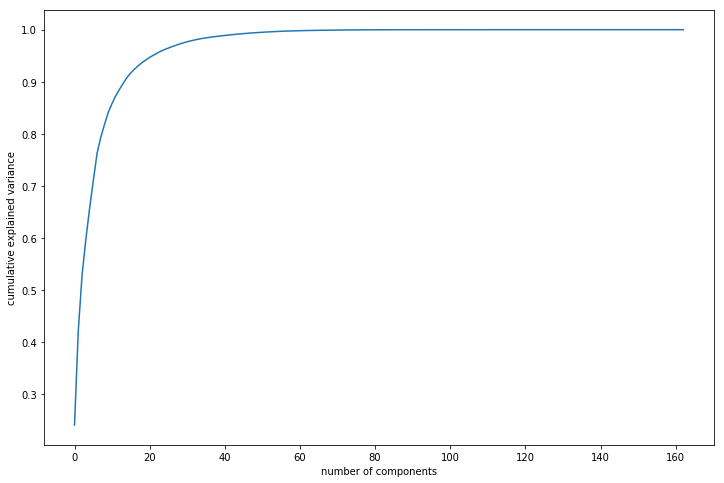

In [202]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [203]:
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=10)

In [204]:
X_norm_pca= inc_pca.fit_transform(telecom_data)

In [205]:
X_norm_pca.shape

(29979, 10)

In [206]:
corrmat = np.corrcoef(X_norm_pca.transpose())

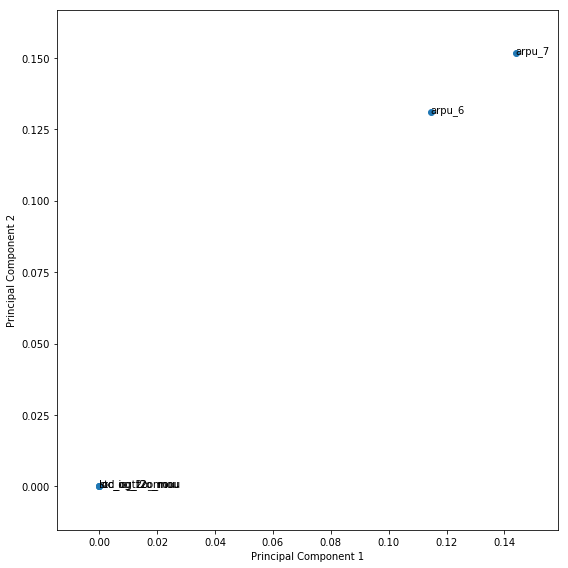

In [209]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs.PC1, pcs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs.Feature):
    plt.annotate(txt, (pcs.PC1[i],pcs.PC2[i]))
plt.tight_layout()
plt.show()

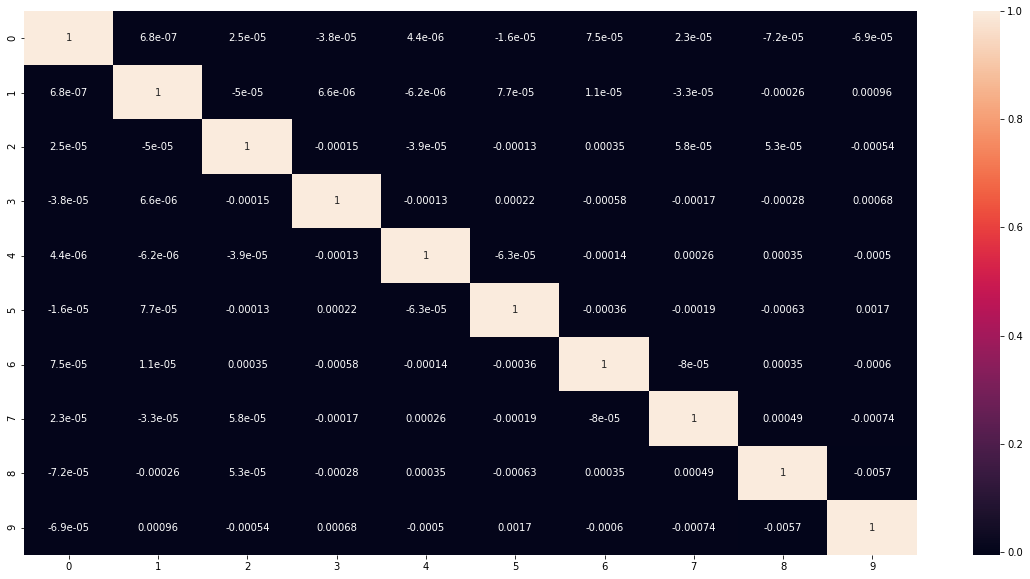

In [210]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [211]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0016592130667514708 , min corr:  -0.005702993488415629


In [214]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [217]:
X = telecom_data
y = telecom_data['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [218]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [219]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
# Making predictions
predictions = rfc.predict(X_test)

In [221]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [222]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      8177
          1       1.00      0.88      0.94       817

avg / total       0.99      0.99      0.99      8994



In [223]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8174    3]
 [  96  721]]


In [225]:
print(accuracy_score(y_test,predictions))

0.9889926617745164


In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.05 , 1:0.95})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [228]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.288716,0.051656,0.010000,1.668582e-07,2,{'max_depth': 2},0.977444,0.958647,0.928571,0.830827,...,1,0.960452,0.964218,0.913999,0.880728,0.942284,0.944166,0.942284,0.935447,0.026930
1,0.625858,0.099746,0.012857,4.517471e-03,7,{'max_depth': 7},1.000000,0.921053,0.917293,0.838346,...,2,0.999372,0.979912,0.968613,0.949153,0.983061,0.986198,1.000000,0.980901,0.016469
2,0.742718,0.069730,0.011572,2.821634e-03,12,{'max_depth': 12},0.909774,0.943609,0.954887,0.860902,...,3,0.998117,0.998117,0.999372,0.995606,0.993726,0.996236,0.997491,0.996952,0.001756
3,0.843734,0.110681,0.016000,3.585426e-03,17,{'max_depth': 17},0.815789,0.936090,0.879699,0.800752,...,4,0.996861,0.998745,0.996861,0.994978,0.996236,0.999373,0.994981,0.996862,0.001573


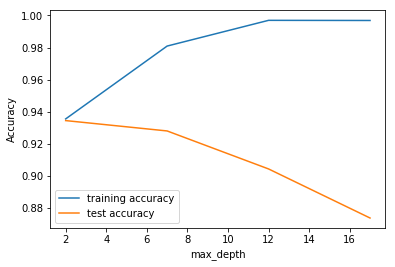

In [229]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()